# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2025

**Rotación de Personal - IBM**

#### **Nombre y matrícula:**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance".**

**El archivo consiste de 1470 registros:**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [35]:
# Importa aquí todas las librerías que consideres necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


La deserción de empleados es uno de los principales retos que enfrentan las organizaciones modernas. Este fenómeno se refiere a la salida voluntaria o involuntaria de colaboradores de la empresa, ya sea por renuncia, jubilación, despido u otras razones. 

El impacto de la deserción es significativo, ya que genera costos directos e indirectos: gastos de reclutamiento y capacitación, pérdida de conocimiento organizacional, disminución de la productividad y, en algunos casos, afectaciones en la moral del resto del equipo. 

Desde el punto de vista analítico, el problema consiste en predecir la probabilidad de que un empleado deje la organización a partir de información histórica y características como edad, salario, satisfacción laboral, antigüedad, desempeño, entre otras variables. Con este tipo de modelos predictivos, las empresas pueden diseñar estrategias más efectivas para retener talento, mejorar las condiciones laborales y reducir los costos asociados a la rotación de personal.

++++++++ Termina la sección de agregar texto. +++++++++++

#### **Descarga el archivo de datos de la página de Kaggle y lo cargamos como un DataFrame de Pandas. Utilizaremos el método “describe” con el argumento include= “all”.**

In [6]:
path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(path)

df = pd.DataFrame(data)

print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 2:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" de Pandas.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

El método descirbe() de Pandas se utiliza para obtener estadística descriptiva de un Dataframe de Pandas. 

Sin el argumento 'include="all"', por defecto solo muestra estadísticas de columnas numéricas, omitiendo estadística descriptiva de columnas categóricas o de texto. 

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 3:**

#### **Con base a la información desplegada por la instrucción anterior, se ha decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Solo tiene 1 valor en toda la columna = "Y" por lo tanto no es estadísticamente significativa en el análisis.

**b)	EmployeeCount**: Solo contiene 1 valor en toda la columna = 1, por lo tanto, no es relevante en el análisis.

**c)	StandardHours**: Solo tiene 1 valor en toda la columna = 80, y representa la cantidad de horas quincenales de cada empleado. 

**d)	EmployeeNumber**: No es una variable relevante puesto que es un consecutivo que indica el ID interno del empleado. 

++++++++ Termina la sección de agregar texto. +++++++++++




Una vez eliminadas las variables anteriores y de acuerdo a la documentación del problema, tenemos la siguiente información.

En las variables categóricas el entero dentro de los paréntesis indica el total de niveles de dicha variable.

In [7]:
# Se eliminan los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


**i. variables numéricas (14):**

NumCompaniesWorked,

TrainingTimesLastYear,

Age,

DailyRate,

DistanceFromHome,

HourlyRate,

MonthlyIncome,

MonthlyRate,

PercentSalaryHike,

TotalWorkingYears,

YearsAtCompany,

YearsInCurrentRole,

YearsSinceLastPromotion,

YearsWithCurrManager

**ii. Variables ordinales (9):**

Education (5),

EnvironmentSatisfaction (4),

JobInvolvement (4),

JobLevel (5),

JobSatisfaction (4),

PerformanceRating (2),

RelationshipSatisfaction (4),

StockOptionLevel (4),

WorkLifeBalance (4)

**iii. Variables binarias (3):**

Attrition (variable de salida),

Gender,

OverTime

**iv. Variables nominales (5):**

BusinessTravel (3),

Department (3),

EducationField (6),

JobRole (9),

MaritalStatus (3)

# **Ejercicio 4:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, con el porcentaje de cada uno que consideres más adecuado y tomando en cuenta los siguientes puntos:**

* **Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente.**

* **Realiza dicha partición conservando la estratificación de las clases de la variable de salida “Attrition”.**

* **Utilizar la semilla "random_state=17" en cada función de partición para permitir la repetibilidad de tu modelo.**

* **Finalmente despliega la dimensión de cada uno de estos tres conjuntos, así como el porcentaje de datos que hay en cada uno de ellos.**



In [11]:


print("Dimensiones y Porcentajes de la partición Train, Val, Test generada:")
print("-"*70)

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Primera partición: Entrenamiento + Temporal (Validación + Prueba)
Xtrain, Xtemp, ytrain, ytemp = train_test_split(
    X, y,
    test_size=0.4,              # 40% de los datos quedan en validación+prueba
    stratify=y,                 # conservar proporción de clases
    random_state=17
)

# Segunda partición: Validación y Prueba a partir de Xtemp, ytemp
Xval, Xtest, yval, ytest = train_test_split(
    Xtemp, ytemp,
    test_size=0.5,              # dividir 50/50 para que ambos queden 20% del total
    stratify=ytemp,             # mantener proporción de clases
    random_state=17
)

print("Dimensiones:")
print("Xtrain:", Xtrain.shape, " ytrain:", ytrain.shape)
print("Xval:  ", Xval.shape,   " yval:  ", yval.shape)
print("Xtest: ", Xtest.shape,  " ytest: ", ytest.shape)

n_total = len(df)
print("\nPorcentajes:")
print("Entrenamiento: {:.2f}%".format(len(Xtrain)/n_total*100))
print("Validación:   {:.2f}%".format(len(Xval)/n_total*100))
print("Prueba:       {:.2f}%".format(len(Xtest)/n_total*100))

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++


Dimensiones y Porcentajes de la partición Train, Val, Test generada:
----------------------------------------------------------------------
Dimensiones:
Xtrain: (882, 30)  ytrain: (882,)
Xval:   (294, 30)  yval:   (294,)
Xtest:  (294, 30)  ytest:  (294,)

Porcentajes:
Entrenamiento: 60.00%
Validación:   20.00%
Prueba:       20.00%


# **Ejercicio 5:**


**a) Aplica la transformación LabelEncoder() de Sklearn a la variable“Attrition”, tomando en cuenta los siguientes puntos:**

* **Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT.**

* **Al aplicar la transformación LabelEncoder, deberás evitar el filtrado de información (data-leakage).**


In [15]:
# a)
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Crear instancia del encoder
le = LabelEncoder()

# Ajustar solo con ytrain
le.fit(ytrain)

# Transformar los tres conjuntos y convertirlos en DataFrames
ytrainT = pd.DataFrame(le.transform(ytrain), columns=["Attrition"])
yvalT   = pd.DataFrame(le.transform(yval),   columns=["Attrition"])
ytestT  = pd.DataFrame(le.transform(ytest),  columns=["Attrition"])

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('Porcentaje de datos en cada clase del conjunto de entrenamiento :\n', 
      ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en cada clase del conjunto de entrenamiento :
 Attrition
0    0.839002
1    0.160998
Name: count, dtype: float64



#### **Además, responde las siguientes preguntas:**

**b) Con base a la documentación de Sklearn, ¿a qué tipo de variables se debe aplicar la transformación LabelEncoder()?**

**c) Encuentra la proporción de datos de cada clase de la variable "ytrainT" y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

**d) ¿Cuál es el umbral del modelo base a superar para evitar modelos subentrenados?**

**e) Con base al contexto del problema, ¿qué significan los valores 0 (NO) y 1 (YES) de la varaible de salida Attrition?**


++++++++ Inicia la sección de agregar texto: ++++++++++++


b) Se aplica a variables categóricas. El objetivo es convertir cada categoría en un valor numérico entero. 

c) Attrition = 0 tiene un 83.9% mientras que Attrition = 1 tinee un 16%. Se puede asumir un problema de datos desbalanceados, lo cuál puede afectar el rendimiento de los modelos predictivos si no se toman medidas adecuadas o se utiliza el f1'score

d) El modelo base o *baseline* más simple sería uno que siempre predice la clase mayoritaria (“No Attrition”).  
Por tanto, el umbral a superar es la exactitud (*accuracy*) de dicho modelo: ~84%.  
Un modelo entrenado que no supere este porcentaje se consideraría subentrenado.

e) En el contexto del problema:  
- **0 (No):** El empleado permanece en la organización, es decir, no presenta *attrition*.  
- **1 (Yes):** El empleado abandona la organización, lo cual constituye un caso positivo de *attrition* (renuncia, despido, retiro, etc.).

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 6:**


#### **Incluye a continuación un análisis gáfico y descriptivo que consideres adecuado. Con base a estos gráficos deberás tomar la decisión de qué transformaciones aplicar a cada variable en el siguiente ejercicio**

C:\Users\martc\AppData\Local\Temp\ipykernel_27916\3755876341.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=data, palette="Set2")


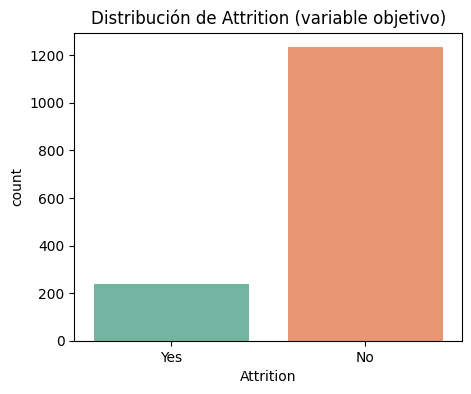

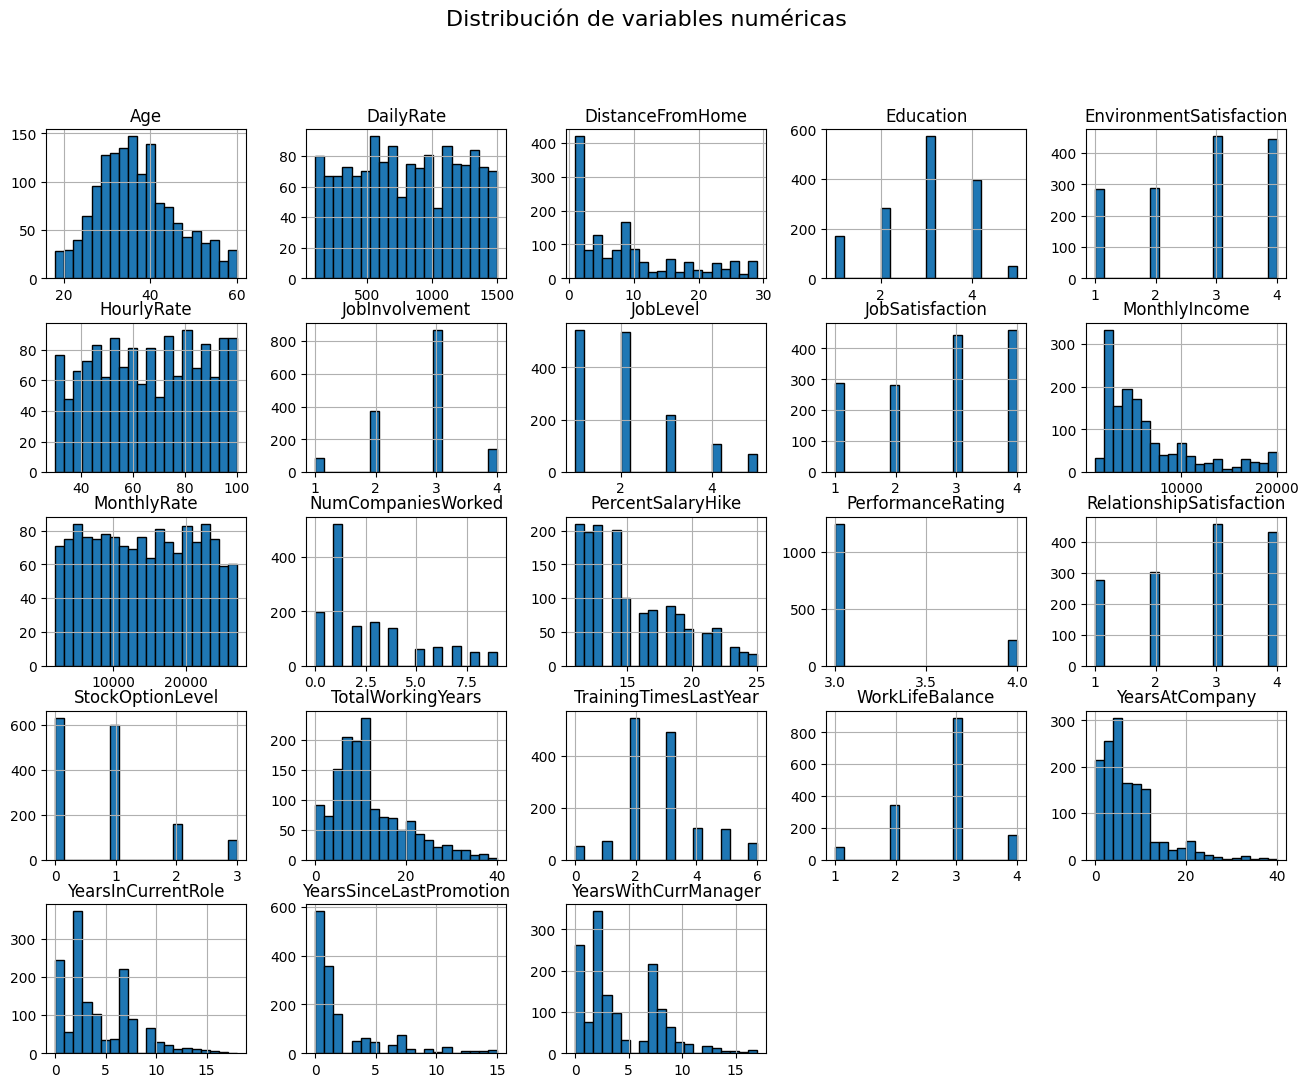

C:\Users\martc\AppData\Local\Temp\ipykernel_27916\3755876341.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="Age", data=data, palette="Set2")


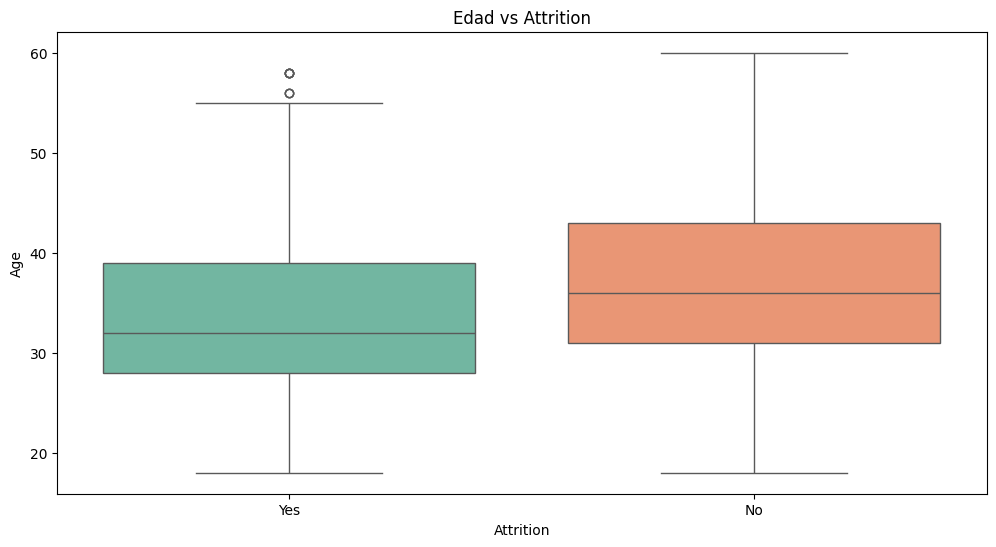

C:\Users\martc\AppData\Local\Temp\ipykernel_27916\3755876341.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="MonthlyIncome", data=data, palette="Set2")


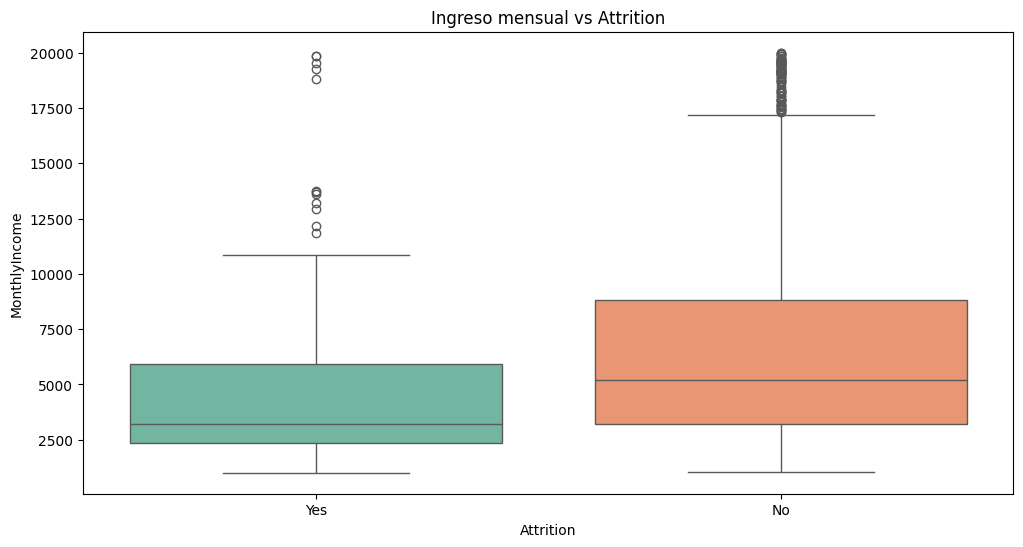

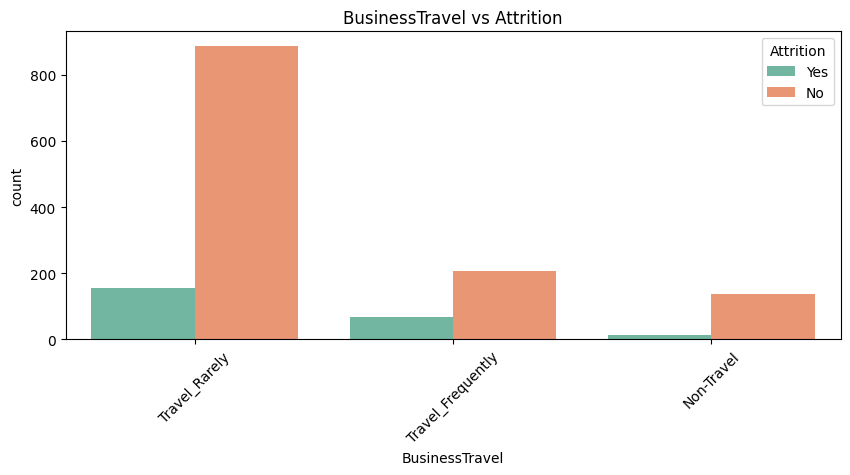

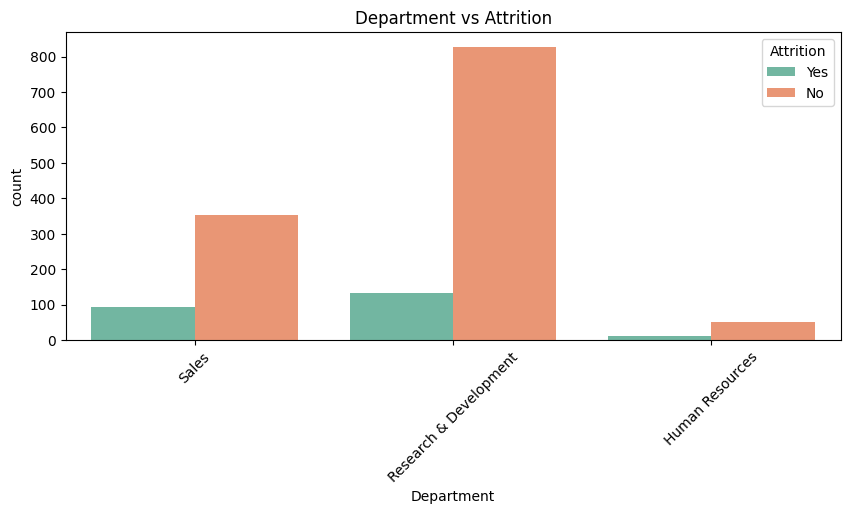

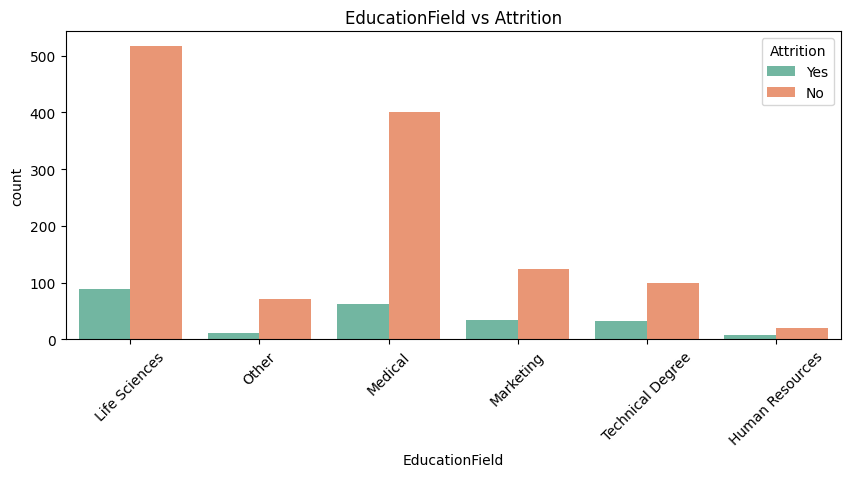

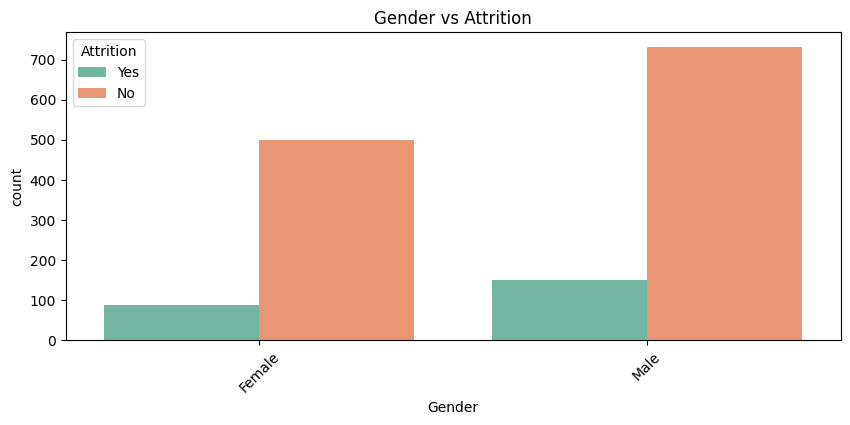

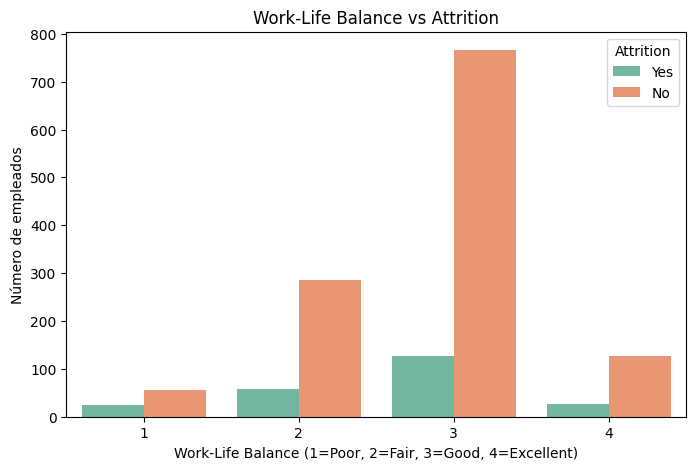

In [19]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres necesarias.
# Copia de datos originales
data = df.copy()

# ===============================
# Distribución de la variable objetivo (Attrition)
# ===============================
plt.figure(figsize=(5,4))
sns.countplot(x="Attrition", data=data, palette="Set2")
plt.title("Distribución de Attrition (variable objetivo)")
plt.show()

# ===============================
# Histogramas de variables numéricas
# ===============================
num_cols = data.select_dtypes(include=["int64","float64"]).columns

data[num_cols].hist(figsize=(16,12), bins=20, edgecolor="black")
plt.suptitle("Distribución de variables numéricas", size=16)
plt.show()

# ===============================
# Boxplots de variables numéricas relevantes contra Attrition
# ===============================
plt.figure(figsize=(12,6))
sns.boxplot(x="Attrition", y="Age", data=data, palette="Set2")
plt.title("Edad vs Attrition")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=data, palette="Set2")
plt.title("Ingreso mensual vs Attrition")
plt.show()

# ===============================
# Variables categóricas más relevantes
# ===============================
cat_cols = data.select_dtypes(include=["object"]).columns.drop("Attrition")

for col in cat_cols[:4]:  # solo unas cuantas para no saturar
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue="Attrition", data=data, palette="Set2")
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=45)
    plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df, palette="Set2")
plt.title("Work-Life Balance vs Attrition")
plt.xlabel("Work-Life Balance (1=Poor, 2=Fair, 3=Good, 4=Excellent)")
plt.ylabel("Número de empleados")
plt.show()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



- **Edad:** Los empleados que se van tienden a ser más jóvenes en comparación con los que permanecen.  
- **Ingreso mensual:** Aquellos con menor salario mensual muestran mayor tasa de attrition.  
- **Viajes de trabajo (BusinessTravel):** Los empleados que viajan con frecuencia presentan una proporción más alta de attrition.  
- **Departamento:** El área de Ventas muestra una mayor propensión a la deserción que otras áreas.  
- **Campo educativo (EducationField):** No hay un campo que concentre todo el attrition, pero se observan más casos en *Life Sciences* y *Medical*.  
- **Género:** Se aprecia attrition en ambos géneros, con ligera tendencia a ser más alto en hombres (pero no marcadamente).  
- **Work-Life Balance:** Existe una relación clara: los empleados que reportan bajo balance entre vida y trabajo (valores 1 o 2) presentan más attrition, mientras que aquellos con balance bueno o excelente (3 o 4) tienden a permanecer más en la empresa.

# **Ejercicio 7:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberás aplicar a cada variable y de acuerdo a su tipo.**



In [25]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline([("scaler", StandardScaler())])
numericas_pipeline_nombres = ["Age", "MonthlyIncome", "DistanceFromHome", "YearsAtCompany","NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
    "TrainingTimesLastYear", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

# ORDINALES:
catOrd_pipeline = Pipeline([("ordinal", OrdinalEncoder())])
catOrd_pipeline_nombres = ["Education", "JobLevel", "EnvironmentSatisfaction","JobSatisfaction", "PerformanceRating", "WorkLifeBalance"]

# BINARIAS:
catBin_pipeline = Pipeline([("ordinal", OrdinalEncoder())])
catBin_pipeline_nombres = ["Gender", "OverTime"]

# NOMINALES:
catNom_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])
catNom_pipeline_nombres = [
    "BusinessTravel", "Department", "EducationField",
    "JobRole", "MaritalStatus"
]



columnasTransformer = ColumnTransformer([
    ("num", numericas_pipeline, numericas_pipeline_nombres),
    ("ord", catOrd_pipeline, catOrd_pipeline_nombres),
    ("bin", catBin_pipeline, catBin_pipeline_nombres),
    ("nom", catNom_pipeline, catNom_pipeline_nombres)
])



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 8:**

* #### **Reagrupamos los conjuntos de entrenamiento y validación en un solo DataFrame. A estos nuevos DataFrame los llamaremos Xtv y ytv.**

* #### **¿Cuál es la justificación de agrupar en este paso los conjuntos de entrenamiento y validación?**

++++++++ Inicia la sección de agregar texto: ++++++++++++


- El conjunto de validación ya cumplió su función durante la etapa de ajuste de hiperparámetros y selección del modelo (por ejemplo, encontrar el mejor valor de *k* en KNN).  
- Una vez identificado el modelo y sus parámetros óptimos, conviene reentrenar con la mayor cantidad posible de datos disponibles antes de evaluar en el conjunto de prueba.  
- Esto permite que el modelo tenga mayor poder de generalización, al haber aprendido de más ejemplos, sin arriesgar fuga de información hacia el conjunto de prueba.  
- El conjunto de prueba se mantiene intacto y separado para realizar la evaluación final y objetiva del rendimiento real del modelo.


++++++++ Termina la sección de agregar texto. +++++++++++

In [26]:
Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrain, yval], axis=0)

print("Dimensión del conjunto Train+Val:")
print(Xtv.shape)
print(ytv.shape)

Dimensión del conjunto Train+Val:
(1176, 30)
(1176,)


# **Ejercicio 9:**

#### **Busca los mejores hiperparámetros para cada modelo.**


>> LR 0.874 (0.015)
>> LASSO 0.878 (0.012)
>> RIDGE 0.878 (0.012)
>> EN 0.878 (0.012)
>> kNN 0.840 (0.010)


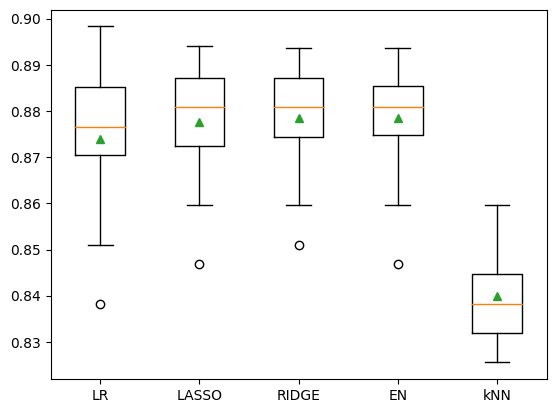

In [32]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs',
                                    max_iter=1000,     
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='saga',
                                    C=1.0,
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    C=1.0,
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    l1_ratio=0.5,
                                    C=1.0,
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5,
                                      weights='distance',
                                      metric='minkowski',
                                      p=2
                                      ))
  nombres.append('kNN')


  return modelos, nombres




# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Pasamos al entrenamiento de los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()


# **Ejercicio 10:**

* #### **Utilizando el mejor modelo encontrado en el paso anterior y los datos Xtv, ytv, realiza ahora una búsqueda de malla para tratar de mejorar el desempeño de dicho modelo.**

* #### **Verifica además que el modelo no esté subentrenado o sobreentrenado.**

* #### **Llama "grid_result" al mejor modelo ajustado.**


* **NOTA: Para esta actividad diremos que el modelo no está sobreentrenado si la diferencia entre Train y Validation es menor al 3%.**


In [34]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=1
)

pipeline = Pipeline(steps=[('ct', columnasTransformer), ('clf', mejor_modelo)])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],   # fuerza de regularización
    'clf__solver': ['lbfgs', 'saga']     # distintos solvers para L2
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

grid_result = grid.fit(Xtv, ytv)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.874995 usando {'clf__C': 1, 'clf__solver': 'lbfgs'}
Promedios Train mean(std): 0.8778(0.0029)
Promedios Val mean(std): 0.8668(0.0090)


# **Ejercicio 11:**

#### **Finalmente, usando el conjunto de prueba (Test), responder los siguientes incisos:**

#### **a) Obtener el desempeño final del mejor modelo con el reporte de métricas classification_report() de Sklearn.**

#### **b) Obtener la matriz de confusión del mejor modelo.**

#### **c) Interpreta los valores FP, FN obtenidos en  la matriz de confusión y de acuerdo al contexto del problema.**

#### **d) Incluye tus conclusiones de este mejor modelo y los pasos futuros a seguir.**

In [38]:
# a) Reporte del desempeño con classification_report():

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

y_pred_num = le.transform(y_pred)  # usar el encoder entrenado en ytrain
print(classification_report(ytestT, y_pred_num, target_names=['No','Yes']))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

              precision    recall  f1-score   support

          No       0.90      0.93      0.92       247
         Yes       0.56      0.47      0.51        47

    accuracy                           0.86       294
   macro avg       0.73      0.70      0.71       294
weighted avg       0.85      0.86      0.85       294



c:\Users\martc\.conda\envs\PycaretTest\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


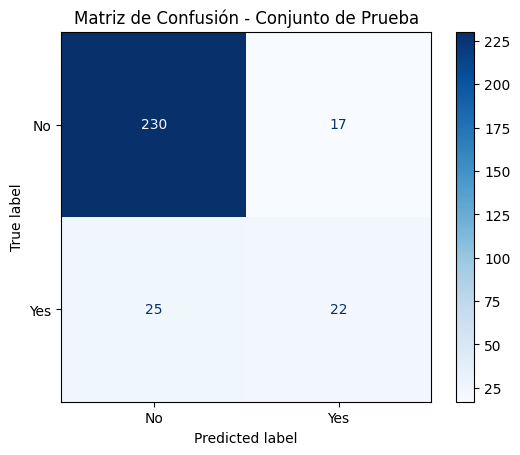

In [40]:
# b) Matriz de confusión:

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

ytest_str = le.inverse_transform(ytestT)

# Matriz de confusión
cm = confusion_matrix(ytest_str, y_pred, labels=['No','Yes'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.show()

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

plt.show()


*  c)
#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

De la matriz de confusión:

FP (Falsos Positivos) = 17
→ El modelo predijo que 17 empleados iban a dejar la empresa (“Yes”), pero en realidad permanecieron (“No”).

Contexto: se invertirían recursos en retención (bonos, entrevistas, capacitaciones) en personas que no tenían intención de irse.

Impacto: costos adicionales innecesarios, aunque no es el peor escenario.

FN (Falsos Negativos) = 25
→ El modelo predijo que 25 empleados permanecerían (“No”), pero en realidad se fueron (“Yes”).

Contexto: la empresa no detectó el riesgo real de salida en estos empleados.

Impacto: este es más grave porque implica pérdida de talento, costos de reemplazo y posibles caídas en productividad o conocimiento clave.

En el problema de attrition, los FN son más críticos que los FP, porque lo más costoso para la organización es no anticipar la salida de personal valioso.

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

* d)

#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

El modelo Ridge Logistic Regression obtuvo un accuracy final de 0.86 en el conjunto de prueba.

El desempeño en la clase mayoritaria (“No”) es muy bueno (precisión 0.90, recall 0.93).

En la clase minoritaria (“Yes”), el desempeño es más bajo (precisión 0.56, recall 0.47, F1=0.51), lo cual refleja el problema de desbalance de clases.

Aunque el modelo no está sobreentrenado, su capacidad de detectar empleados que realmente se van (recall de 0.47) es limitada.

**Pasos Futuros Recomendados:**

1. Balanceo de clases
2. Optimizar el modelo en función de recall o F1-score
3. Probar algoritmos mas complejos como Random Forest, XGBoost que manejan mejor el desbalance de clases. 
4. En el negocio, integrar el modelo como herramienta de alerta temprana con políticas internas de retención en conjunto con RRHH.

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

# **Ejercicio 12**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

- La deserción de empleados (*attrition*) es un problema relevante para las organizaciones por los costos asociados a la pérdida de talento.
- Durante el análisis exploratorio identificamos variables numéricas y categóricas clave (Edad, Ingreso Mensual, Work-Life Balance, BusinessTravel, Department, entre otras) que muestran correlación con el attrition.
- Se aplicaron transformaciones con `Pipeline` y `ColumnTransformer`, asegurando un preprocesamiento adecuado: escalado en variables numéricas, codificación ordinal y one-hot en variables categóricas.
- En la comparación inicial de modelos, las variantes de **Regresión Logística (LR, LASSO, RIDGE, ElasticNet)** mostraron mejor desempeño (~0.88 en validación) frente a **KNN (~0.84)**.
- Mediante búsqueda en malla, el mejor modelo fue **Ridge Logistic Regression (penalty=L2, C=1, solver=lbfgs)**, con un accuracy de **~0.87 en validación** y **0.86 en prueba**.
- La diferencia entre desempeño en entrenamiento y validación fue < 3%, confirmando que el modelo no está sobreentrenado.
- El modelo predice muy bien la clase mayoritaria (“No Attrition”), pero tiene limitaciones en la minoritaria (“Yes Attrition”), reflejando un problema de **desbalance de clases**.
- La matriz de confusión mostró que los **falsos negativos (FN)** —empleados que se van pero no son detectados— son el error más costoso para la organización.


#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<